<a href="https://colab.research.google.com/github/GGGGLORIA12138/Bike_Rentals/blob/main/Final_Project_Bike-sharing_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Bike-Sharing Rentals**
## PREPARED BY GLORIA TU

Bike-sharing is a popular tech trend. However, the bike rental market may influence by working days, holidays, weather, etc. **In this analysis, I attempt to (1) understand the potential factors which might affect the bike rentals (2011-2012) and (2) predict daily bike rentals using the linear regression model for company X.**

This report will be broken down into four sections：
*   Part 1: Load and explore the dataset.
*   Part 2: Graph the dataset.
*   Part 3: Prepare the data for modeling.
*   Part 4: Build and evaluate models for predicting daily 'total_rentals'.












## **PART 1: LOAD AND EXPLORE THE DATASET**
Prior to beginning the analysis, we need to load the dataset and the appropriate R code libraries and then explore the data.

In [ ]:
# Load the appropriate Python libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set(style="darkgrid")

In [ ]:
# Read the CSV file with bike rentals data.
url = 'http://bit.ly/bike-data'
df_rentals = pd.read_csv(url)

In [ ]:
# Calculate the dimensions (rows and columns) in the dataset.
df_rentals.shape

(731, 14)

The output below shows all the columns and data types in the dataset.

In [ ]:
# List the columns and their data types.
df_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  731 non-null    int64  
 1   date                731 non-null    object 
 2   yr                  731 non-null    int64  
 3   mnth                731 non-null    int64  
 4   weekday             731 non-null    int64  
 5   season              731 non-null    int64  
 6   holiday             731 non-null    int64  
 7   working_day         731 non-null    int64  
 8   temp                731 non-null    float64
 9   atemp               731 non-null    float64
 10  hum                 731 non-null    float64
 11  windspeed           731 non-null    float64
 12  casual_rentals      731 non-null    int64  
 13  registered_rentals  731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# Preview the dataset.
df_rentals.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


Many factors will affect bike-sharing rentals. We want to discuss the relationships between those factors and 'total_rentals', so we will add the 'casual_rentals' and 'registered_rentals' together.  

In [ ]:
# Create a 'total_rentals' column.
df_rentals['total_rentals']=df_rentals['casual_rentals']+df_rentals['registered_rentals']

In [ ]:
# Preview the dataset.
df_rentals.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Generate descriptive stats for the numeric columns in the dataset.
df_rentals.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


To read the 'total_rentals' information simply, we create a pivot table to display the sum and average of bike-sharing rentals per month in 2011 (i.e. 'yr 0') and 2012 (i.e. 'yr 1').

In [ ]:
# Create a pivot table.
pd.pivot_table(df_rentals,index=['yr','mnth'], values=['total_rentals'], aggfunc=[np.sum, np.mean])

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

Checking any missing value in the dataset is important to avoid an imbalance in the observations. Our dataset has NO null values.

In [ ]:
# Determine whether or not there are any missing values in the dataset.
df_rentals.isnull().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

## **PART 2: GRAPH THE DATASET**
Prior to building a predictive model, we graph the dataset to understand bike-sharing rentals, and potential indicators that may affect rentals. The graphs below were organized by those questions, which are following:

*   Q1: "On most days of the year, how many bikes have been rented per day?"
*   Q2: "What is the relationship between working days and bike rentals?"
*   Q3: "Do different seasons affect the bike rentals?"
*   Q4: "What is the monthly bike rentals change by years?"
*   Q5: "What is the relationship between 'total_rentals' and the weather indicators?"








### QUESTION #1: "On most days of the year, how many bikes have been rented per day?"

Based on the histogram below, the 'total_rentals' represent a normal distribution. Therefore, on most days of 2011 and 2012, about 4,000 to 5,000 bike-sharing has been rented every-day.

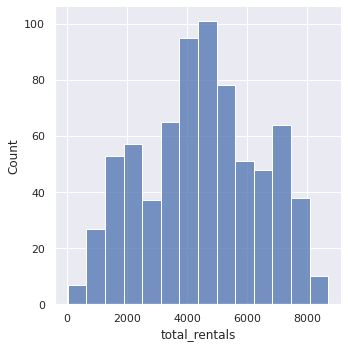

In [ ]:
# Create a histogram.
sns.displot(df_rentals, x="total_rentals");

### QUESTION #2: "What is the relationship between working days and bike rentals?"

Based on the scatterplot below, there is a positive relationship between working days and bike rentals. The working days(i.e. yellow dots) tend to have more registered rentals, and non-working days(i.e. blue dots) have more casual rentals. 

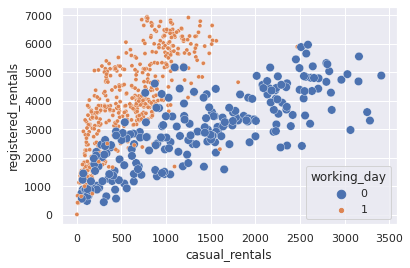

In [ ]:
# Generate a scatterplot.
sns.scatterplot(x="casual_rentals", y="registered_rentals", size="working_day", hue="working_day", data=df_rentals);

### QUESTION #3: "Do different seasons affect the bike rentals?"

Based on the swarmplot below, it appears that high average rentals in summer (i.e. 2) and fall (i.e. 3), but low in spring (i.e. 1) and winter (i.e. 4). The density of dots shows the average of rentals directly for four seasons. Therefore, we CAN say that different seasons will affect the bike rentals.        


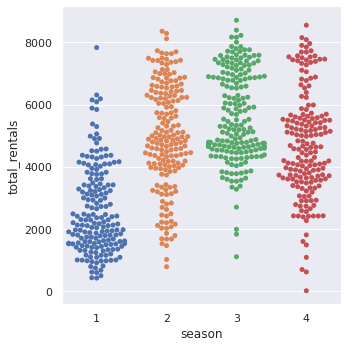

In [ ]:
# Generate a swarmplot to explore the 'total_rentals' by season.
sns.catplot(x="season", y="total_rentals", kind="swarm", data=df_rentals)

### QUESTION #4: "What is the monthly bike rentals change by years?"

Based on the lineplot below, the monthly bike rentals in 2012 had increased significantly from 2011.

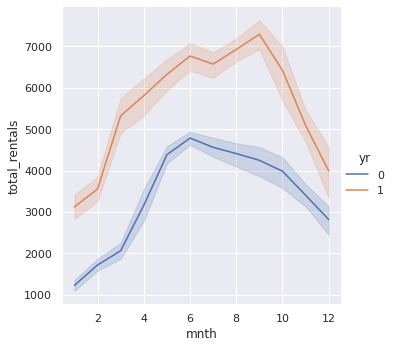

In [ ]:
# Generate a lineplot that shows average daily rentals by month and split the lines by year.
sns.relplot(x="mnth", y="total_rentals", hue="yr", kind="line", data=df_rentals);

### QUESTION #5: "What is the relationship between 'total_rentals' and the weather indicators?"

Based on the pair plot below, it appears a **positive** relationship between 'total_rentals' and temp(atemp): as the temp(atemp) rises, so does the 'total_rentals'. The windspeed seems to have a **negative** relation with 'total_rentals': as the windspeed goes higher, the 'total_rentals' decrease. In addition, there does not appear to be an obvious correlation in hum(humidity) with 'total_rentals'. We need more information to evaluate if the hum does not have relationship with 'total_rentals'.

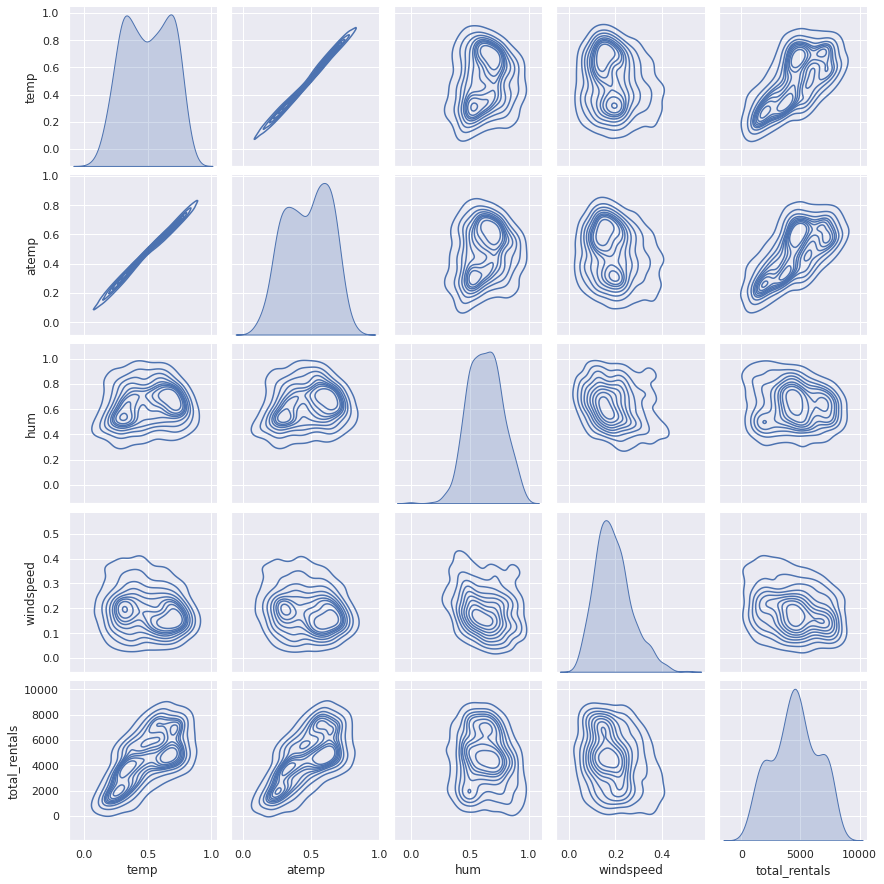

In [ ]:
# Generate a pairplot to show the relationship between 'total_rentals' and the weather indicators.
sns.pairplot(df_rentals[['temp','atemp','hum','windspeed','total_rentals']], kind='kde');

 ## **PART 3: PREPARE THE DATA FOR MODELING**

Prior to using the linear regression to predict the daily bike rentals, we need to prepare some crucial data to create the regression model. 

We only want to discuss the correlation between weather indicators ('temp','atemp','hum','windspeed') and 'total_rentals', so we will create a new dataset which includes the variables we want to explore.

In [ ]:
#  Select a subset of columns using their names.
df_rentals_2 = df_rentals[['temp','atemp','hum','windspeed','total_rentals']]
df_rentals_2.head()

,temp,atemp,hum,windspeed,total_rentals
0,0.344167,0.363625,0.805833,0.160446,985
1,0.363478,0.353739,0.696087,0.248539,801
2,0.196364,0.189405,0.437273,0.248309,1349
3,0.200000,0.212122,0.590435,0.160296,1562
4,0.226957,0.229270,0.436957,0.186900,1600


Based on the matrix below, the correlation coefficients show the strength of the linear relationship between two variables. 

To better visualize the correlation between 'total_rentals' and weather indicators, we use a heatmap (the second chart). The deeper colours indicate a negative relationship between variables. Conversely, lighter colours indicate a positive relationship between variables. However, in the further analysis, we only include those independent variables shown in the heatmap that have a correlation coefficient with respect to 'total_rentals' that is greater than 0.5 or less than -0.5. Also, we do NOT include "atemp", since it is highly correlated with another independent variable 
('temp') and thus NOT independent. 

In [ ]:
# Create the correlation matrix.
df_rentals_2.corr()

,temp,atemp,hum,windspeed,total_rentals
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
total_rentals,0.627494,0.631066,-0.100659,-0.234545,1.000000


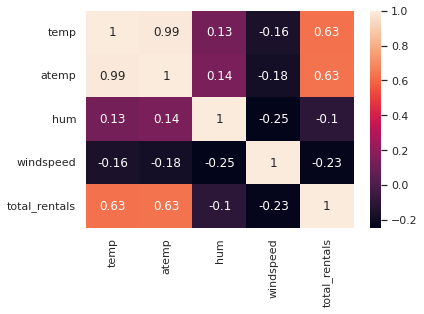

In [ ]:
# Use a heatmap to visualize the correlation between 'total_rentals' and weather indicators.
sns.heatmap(df_rentals_2.corr(), annot=True);

## **PART 4: BUILD AND EVALUATE MODELS FOR PREDICTING DAILY 'TOTAL_RENTALS'**


We can build the regression model by using the above information. Since the atemp are NOT independent, humidity and windspeed have a weak correlation with 'total_rentals', we only need to evaluate the linear regression between 'temp' and 'total_rentals'.

In [ ]:
# Separate the dependent variable(y) and independent variables(X)(not include atemp).
X = df_rentals_2[['temp']]
y = df_rentals_2['total_rentals']

In [ ]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Train ("fit") the regression model using training data.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Identify intercepts and coefficients of the regression model.
print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]


After we get the intercept and coefficient of the variable, we can predict the 'totoal_rentals' with a given independent variable('temp'). 

In [ ]:
# Predict "total_rentals" when "temp" = 0.30.
new_total_rentals = [[0.3]]
model.predict(new_total_rentals)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3267.12110394])

To confirm our linear regression model is unbiased and precise, we can predict the 'total_rentals' in the test data.

In [ ]:
# Predict 'total_rentals' in the test data.
y_pred = model.predict(X_test)
y_pred

array([5766.52408142, 6175.90654429, 2836.18777293, 2570.13732862,
       3536.45524381, 4279.81152301, 4365.99560363, 4252.87616984,
       4155.91665516, 2643.20601889, 2260.99161202, 3428.72029507,
       3683.06449397, 5901.18791937, 6154.36214013, 5432.55026509,
       5098.57644877, 3843.49370696, 3288.6655081 , 4110.24872374,
       5895.80343432, 2965.46712584, 3391.01597179, 5804.22840469,
       2378.32555272, 5437.93475014, 6811.52787475, 5572.60505206,
       4748.44917729, 5098.57644877, 2222.11084664, 5561.829618  ,
       4215.17184656, 5820.38832381, 3741.14324327, 3369.46510367,
       6348.28116949, 6897.71841933, 4010.47738314, 4290.58049311,
       5012.39236815, 3677.44084212, 5314.04634625, 3961.9976258 ,
       5965.82759582, 4651.48966262, 3092.87192813, 5680.33353684,
       3035.49775131, 2963.59257522, 5933.5077576 , 6122.04230191,
       4328.29128035, 5567.21410304, 5917.34783848, 4295.97144213,
       3428.72029507, 4274.420574  , 6052.01167644, 3046.26672

The R square value seems low but is reasonable because we ignored many independent variables, only one independent variable has been included in this model.

In [ ]:
# Generate the R squared.
metrics.r2_score(y_test, y_pred)

0.37540464616240443